# Project 5
# Project on Application of Time series Models

#### Pick up the following stocks and generate forecasts accordingly
#### Stocks:
#### 1. NASDAQ.AAPL
#### 2. NASDAQ.ADP
#### 3. NASDAQ.CBOE
#### 4. NASDAQ.CSCO
#### 5. NASDAQ.EBAY

In this project we will perform a time series analysis using the Autoregressive Integrated Moving Average (ARIMA) modeling technique in Python. 

ARIMA modeling, in theory, is the most general class of models for forecasting a time series.

A time series is a collection of data points that are collected at constant time intervals. What differentiates a time series from regular regression problem data is that the observations are time dependent and, along with an increasing or decreasing trend, many time series exhibit seasonal trends. 

The ARIMA technique seeks to model these trends in data over time and then extrapolate into the future to obtain forecasts. 
Time series modeling is a powerful method to derive insights from time-based data and make informed decisions about future trends.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

Time series are widely used for non-stationary data, like economic, weather, stock price, and retail sales in this post. We will demonstrate different approaches for forecasting retail sales time series. Let’s get started!

In [41]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import sys
import seaborn as sns
import matplotlib
%matplotlib inline

# Core Libraries - Machine Learning
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr

In [2]:
plt.style.use('fivethirtyeight')     # replicate the styles from FiveThirtyEight.com (used for self descriptive graphs)

df = pd.read_csv('data_stocks1.csv')  # reading data from file
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.rename(columns={'NASDAQ.ADP':'ADP'}, inplace=True)    # renaming column name i.e removing special characters

In [5]:
df.head()

,DATE,SP500,NASDAQ.AAL,AAPLE,NASDAQ.ADBE,NASDAQ.ADI,ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [7]:
df['logADP']= np.log(df['ADP'])
df['diflogADP'] = df['logADP'] - df['logADP'].shift(periods=-1)
df = df.dropna()

In [8]:
df.shape

(41265, 505)

In [9]:
df.head()

,DATE,SP500,NASDAQ.AAL,AAPLE,NASDAQ.ADBE,NASDAQ.ADI,ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,DATE_F,logADP,diflogADP
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 14:30:00,4.627225,0.000881
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 14:31:00,4.626344,-0.000710
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 14:32:00,4.627054,0.000710
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 14:33:00,4.626344,0.000784
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 14:34:00,4.625561,0.000196


In [10]:
data = df[['DATE','DATE_F','ADP','logADP','diflogADP']][:-100]
test = df[['DATE','DATE_F','ADP','logADP','diflogADP']][-100:]

In [11]:
data.shape

(41165, 5)

In [12]:
data.head()

,DATE,DATE_F,ADP,logADP,diflogADP
0,1491226200,2017-04-03 14:30:00,102.2300,4.627225,0.000881
1,1491226260,2017-04-03 14:31:00,102.1400,4.626344,-0.000710
2,1491226320,2017-04-03 14:32:00,102.2125,4.627054,0.000710
3,1491226380,2017-04-03 14:33:00,102.1400,4.626344,0.000784
4,1491226440,2017-04-03 14:34:00,102.0600,4.625561,0.000196


In [13]:
indexed_df = data.set_index('DATE_F')

In [14]:
dataset = indexed_df['ADP']
dataset.head(5)

DATE_F
2017-04-03 14:30:00    102.2300
2017-04-03 14:31:00    102.1400
2017-04-03 14:32:00    102.2125
2017-04-03 14:33:00    102.1400
2017-04-03 14:34:00    102.0600
Name: ADP, dtype: float64

In [15]:
# log transform for better interpretation 
df['logADP'] = np.log(df['ADP'])      

# shift index by desired number of periods with an optional time freq
df['diflogADP'] = df['logADP'] - df['logADP'].shift(periods=-1) 

df = df.dropna()   # remove missing values

In [16]:
data = df[['DATE','ADP','logADP','diflogADP']]

In [17]:
data.head()

,DATE,ADP,logADP,diflogADP
0,1491226200,102.2300,4.627225,0.000881
1,1491226260,102.1400,4.626344,-0.000710
2,1491226320,102.2125,4.627054,0.000710
3,1491226380,102.1400,4.626344,0.000784
4,1491226440,102.0600,4.625561,0.000196


# Find optimal parameters and build an ARIMA model

To apply an ARIMA model to our time series, we need to find optimal values for the following three model parameters (p,d,q):

The number of autoregressive (AR) terms (p): AR terms are just lags of the dependent variable. So, if p=2, it means that predictors of x(t) will be x(t-1) and x(t-2).

The number of moving average (MA) terms (q): MA terms are lagged forecast errors in the prediction equation. For instance, if q=2, the predictors for x(t) will be e(t-1) and e(t-2) where e(i) is the difference between the moving average at i-th instant and the actual value.

The number of differences (d): These are the number of non-seasonal differences. If, d=1, it meanns using the first order differenced time series.

There are two ways to determine the number of AR and MA terms. The first is to use the arma_order_select_ic function in Python. The second uses plots of the autocorrelation function (ACF) and partial autocorrelation function (PACF).

Text(0.5, 1.0, 'Differenced Log of closing price')

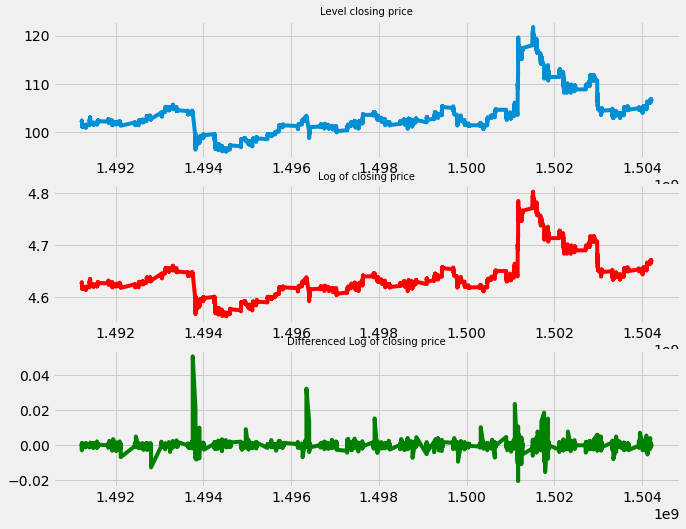

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot (data.DATE,data.ADP,label="ADP Price")
plt.title("Level closing price", size=10)
#plt.ylable("Price in dollars",size=10)

plt.subplot(3,1,2)
plt.plot (data.DATE,data.logADP,label="Log of ADP", color='r')
plt.title("Log of closing price", size=10)
#plt.ylable("Price in Log Dollars",size=10)

plt.subplot(3,1,3)
plt.plot (data.DATE,data.diflogADP,label="1st difference  of Log of ADP", color='g')
plt.title("Differenced Log of closing price", size=10)
#plt.ylable("Differenced Closing Price",size=10)
#plt.xlabel('Day',size=10)

Text(0, 0.5, 'PACF')

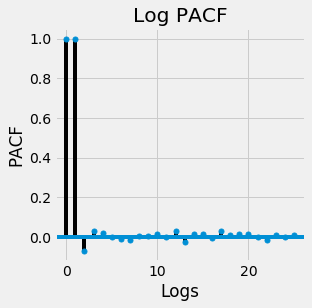

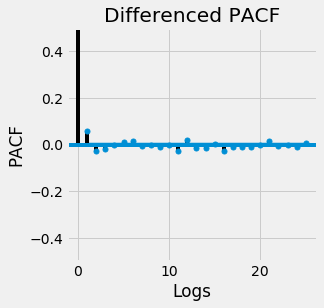

In [20]:
fig, ax = plt.subplots(figsize=(4,4))

#PACF displays and plots the sample partial autocorrelation function of one or more time series
plot_pacf(data.logADP, lags = 25, ax = ax)
ax.set_title('Log PACF')    
ax.set_xlabel('Logs')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.diflogADP, lags = 25, ax = ax)
ax.set_title('Differenced PACF')
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Logs')
ax.set_ylabel('PACF')


C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:934: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:934: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5, 1.0, 'Logged Difference ACF plot')

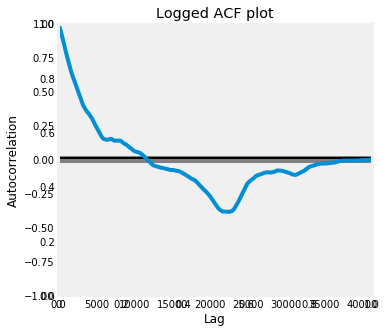

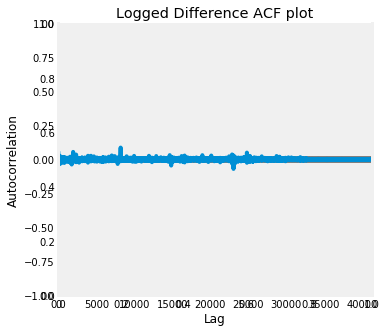

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
ax = autocorrelation_plot(data.logADP)
ax.set_title("Logged ACF plot")

fig, ax = plt.subplots(figsize=(5,5))
ax = autocorrelation_plot(data.diflogADP)
ax.set_title("Logged Difference ACF plot")

In [22]:
#perform Dickey-Fuller test

print("Result of Dickey-Fuller Test:")
dftest = adfuller(data.diflogADP, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Static','p-value','#Lag Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Result of Dickey-Fuller Test:
Test Static                      -30.760137
p-value                            0.000000
#Lag Used                         39.000000
Number of Observations Used    41224.000000
Critical Value (10%)              -2.566807
Critical Value (5%)               -2.861610
Critical Value (1%)               -3.430509
dtype: float64


Because the test statistic is less than the 5% critical value and the p-value is lower than 0.05, the moving average is constant over time and the null hypothesis of the Dickey-Fuller test can be rejected. This shows that the weekly time series is stationary.

As it is stationary, before we apply ARIMA models for forecasting, we need not to transform this time series into a stationary time series.

In [43]:
ararray = (data.logADP.dropna().as_matrix())

p = 0
q = 0
d = 1
pdq = []
aic = []

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print(x1,x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
        
keys = pdq
values = aic
d = dict(zip(keys,values))
minaic = min(d, key=d.get)

for i in range(3):
    p = minaic[0]
    d = minaic[1]
    q = minaic[2]
print("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()


C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C

(0, 1, 0) -482518.2036049923
(0, 1, 1) -482670.44153660245
(0, 1, 2) -482684.1448843109
(1, 1, 0) -482663.57409683114
(1, 1, 1) -482678.774331282


C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(1, 1, 2) -482692.3970701307
(2, 1, 0) -482690.10050829046
(2, 1, 1) -482694.9517535401
(2, 1, 2) -482704.91845539457
Best Model is : (2, 1, 2)


# Find optimal parameters and build an ARIMA model

To apply an ARIMA model to our time series, we need to find optimal values for the following three model parameters (p,d,q):
The number of autoregressive (AR) terms (p): AR terms are just lags of the dependent variable. So, if p=2, it means that predictors of x(t) will be x(t-1) and x(t-2).

The number of moving average (MA) terms (q): MA terms are lagged forecast errors in the prediction equation. For instance, if q=2, the predictors for x(t) will be e(t-1) and e(t-2) where e(i) is the difference between the moving average at i-th instant and the actual value.

The number of differences (d): These are the number of non-seasonal differences. In our case, d=1, as we are modeling using the first order differenced time series.
There are two ways to determine the number of AR and MA terms. The first is to use the arma_order_select_ic function in Python. The second uses plots of the autocorrelation function (ACF) and partial autocorrelation function (PACF).

In [44]:
ARIMIAmod

In [45]:
ARIMIAmod.predict(typ='levels').shape

(41263,)

In [46]:
data.shape

(41264, 8)

In [47]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')
data.head()

C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,DATE,ADP,logADP,diflogADP,predict,error,sqrError,absError
0,1491226200,102.2300,4.627225,0.000881,NaN,NaN,NaN,NaN
1,1491226260,102.1400,4.626344,-0.000710,4.627226,-0.000882,7.774770e-07,0.000882
2,1491226320,102.2125,4.627054,0.000710,4.626294,0.000761,5.791043e-07,0.000761
3,1491226380,102.1400,4.626344,0.000784,4.627119,-0.000776,6.025402e-07,0.000776
4,1491226440,102.0600,4.625561,0.000196,4.626308,-0.000732,5.352490e-07,0.000732


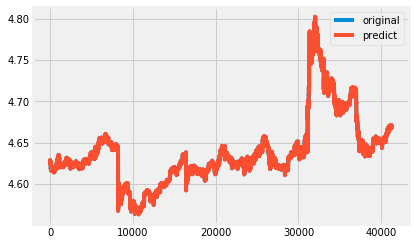

In [48]:
plt.plot(data['logADP'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [49]:
np.mean(np.abs(np.array((data['logADP'][1:] - data['predict'][1:]))))

0.0003204004817633399

In [50]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

array([[4.66693796, 4.66967156],
       [4.66632462, 4.67030709],
       [4.66588378, 4.67077646],
       [4.66552204, 4.67114387],
       [4.6651994 , 4.67146133],
       [4.66490422, 4.67175453],
       [4.66463268, 4.67202884],
       [4.66438071, 4.67228439],
       [4.66414418, 4.67252325],
       [4.66392023, 4.67274881]])

In [51]:
stepahead

array([4.66830476, 4.66831585, 4.66833012, 4.66833296, 4.66833036,
       4.66832938, 4.66833076, 4.66833255, 4.66833371, 4.66833452])

In [52]:
data['error'] = (data['logADP'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])

C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [53]:
data.head()

,DATE,ADP,logADP,diflogADP,predict,error,sqrError,absError
0,1491226200,102.2300,4.627225,0.000881,NaN,NaN,NaN,NaN
1,1491226260,102.1400,4.626344,-0.000710,4.627226,-0.000882,7.774761e-07,0.000882
2,1491226320,102.2125,4.627054,0.000710,4.626294,0.000760,5.780105e-07,0.000760
3,1491226380,102.1400,4.626344,0.000784,4.627119,-0.000775,6.007199e-07,0.000775
4,1491226440,102.0600,4.625561,0.000196,4.626308,-0.000747,5.585302e-07,0.000747


Text(0.5, 0, 'Month')

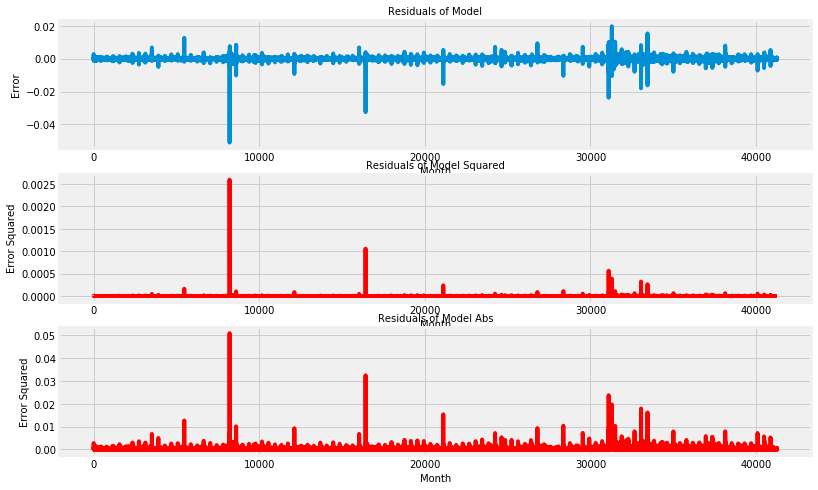

In [54]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:934: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:934: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


Text(0.5, 1.0, 'Squared Error ACF plot')

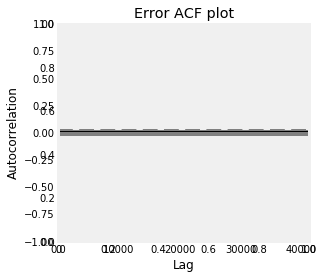

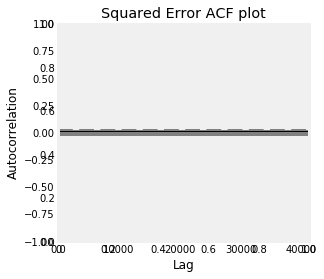

In [55]:
fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.error)
ax.set_title('Error ACF plot')

fig, ax = plt.subplots(figsize=(4,4))
ax = autocorrelation_plot(data.sqrError)
ax.set_title('Squared Error ACF plot')


Text(0, 0.5, 'PACF')

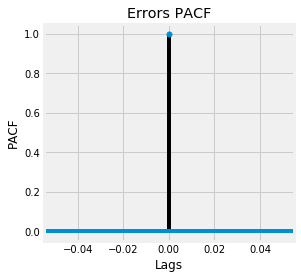

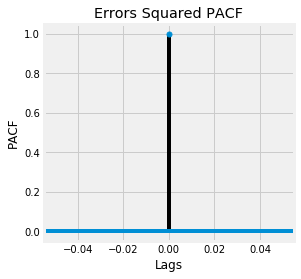

In [56]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [1]:
test = df[['DATE','ADP','logADP','diflogADP']][-100:]

NameError: name 'df' is not defined

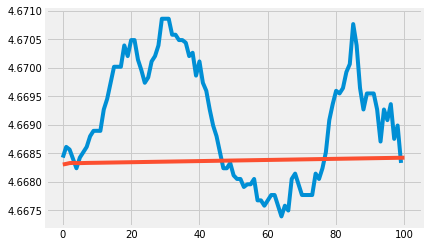

In [58]:
plt.plot(test.reset_index().logADP)
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

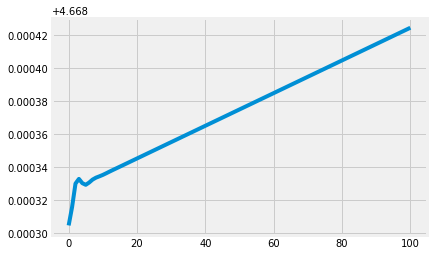

In [59]:
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

In [60]:
test = test.reset_index()

In [61]:
ARIMIAmod.forecast(1)[0]

array([4.66830476])

In [62]:
ararray = list(data.logADP.values)
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

In [63]:
test_logADP = list(test.logADP.values)

In [66]:
ararray = list(data.logADP.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logADP[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


47
48
49
50
51
52
53
54
55
56
57
58


C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\richa\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  

LinAlgError: SVD did not converge

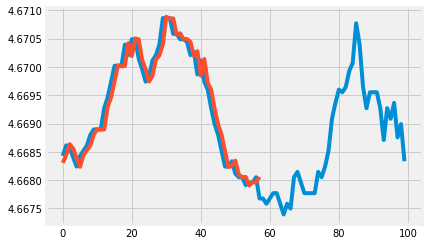

In [67]:
plt.plot(test_logADP)
plt.plot(np.array(test_predict).ravel())

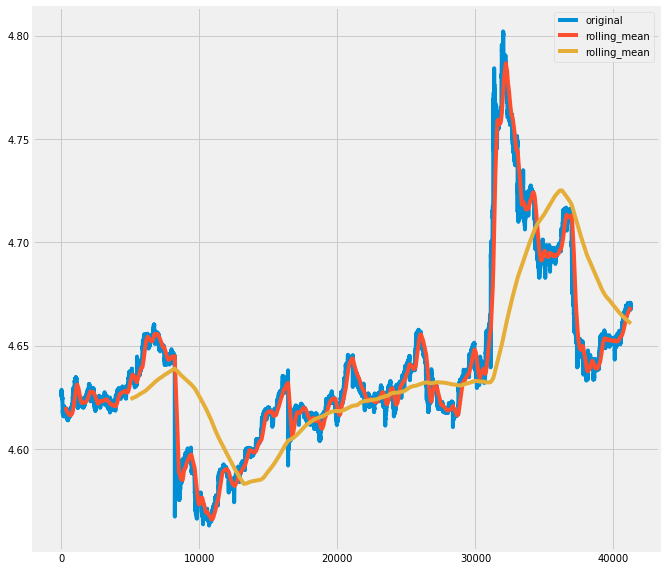

In [68]:
plt.figure(figsize=(10,10))
plt.plot(data.logADP, label='original')
plt.plot(data.logADP.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logADP.rolling(5000).mean(), label='rolling_mean')
plt.legend()

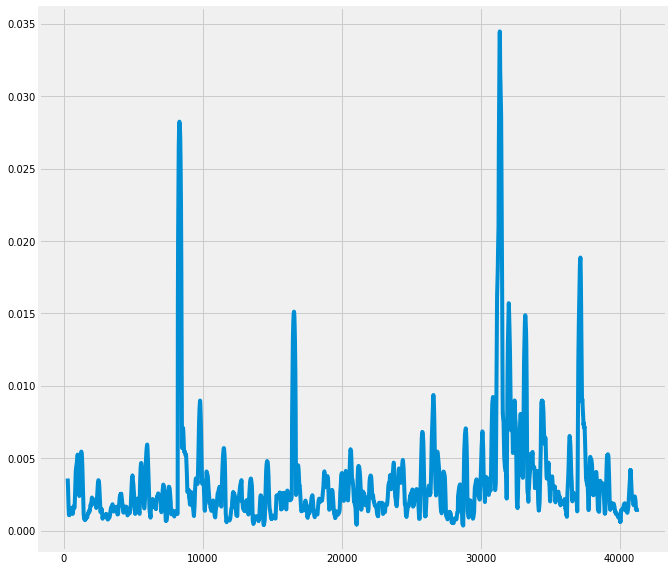

In [69]:
plt.figure(figsize=(10,10))
plt.plot(data.logADP.rolling(300).std())

## Measure the variance between the data and the values predicted by the model
We can measure whether the results of your model fit the underlying data by using the residual sum of squares (RSS) metric. A small RSS indicates that the model fits tightly to the data.

Yet another approach to validate the ARIMA model appropriateness is by performing residual analysis.

Print the results of the ARIMA model and plot the residuals. A density plot of the residual error values indicates a normal distribution centered around zero mean. Also, the residuals do not violate the assumptions of constant location and scale with most values in the range (-1,1).

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                41320
Model:                 ARIMA(2, 1, 2)   Log Likelihood              241717.974
Method:                       css-mle   S.D. of innovations              0.001
Date:                Mon, 12 Nov 2018   AIC                        -483423.948
Time:                        21:43:23   BIC                        -483372.173
Sample:                             1   HQIC                       -483407.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.824e-07   3.49e-06      0.281      0.778   -5.86e-06    7.82e-06
ar.L1.D.y      0.3853      0.099      3.909      0.000       0.192       0.579
ar.L2.D.y     -0.3236      0.074     -4.392      0.0

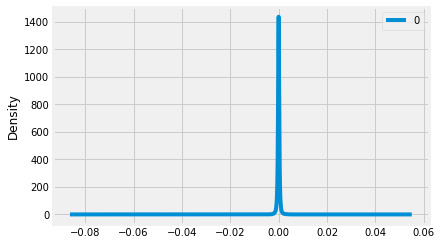

In [70]:
from pandas import DataFrame

print(ARIMIAmod.summary())
# plot residual errors
residuals = DataFrame(ARIMIAmod.resid)
residuals.plot(kind='kde')
print(residuals.describe())

### The model validation checks we ran have confirmed good results.

We have performed forecasting for stocks of Automatic Data Processing, Inc.,  using ARIMA as we trained the model on the entire time series data. 